Hola &#x1F600;

Soy **Hesus Garcia**  como "Jesús" pero con H. Sé que puede ser confuso al principio, pero una vez que lo recuerdes, ¡nunca lo olvidarás! &#x1F31D;	. Como revisor de código de Practicum, estoy emocionado de examinar tus proyectos y ayudarte a mejorar tus habilidades en programación. si has cometido algún error, no te preocupes, pues ¡estoy aquí para ayudarte a corregirlo y hacer que tu código brille! &#x1F31F;. Si encuentro algún detalle en tu código, te lo señalaré para que lo corrijas, ya que mi objetivo es ayudarte a prepararte para un ambiente de trabajo real, donde el líder de tu equipo actuaría de la misma manera. Si no puedes solucionar el problema, te proporcionaré más información en la próxima oportunidad. Cuando encuentres un comentario,  **por favor, no los muevas, no los modifiques ni los borres**. 

Revisaré cuidadosamente todas las implementaciones que has realizado para cumplir con los requisitos y te proporcionaré mis comentarios de la siguiente manera:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

</br>

**¡Empecemos!**  &#x1F680;

# Plan de trabajo

## Descripción del proyecto

Al operador de telecomunicaciones Interconnect le gustaría poder pronosticar su tasa de cancelación de clientes. Si se descubre que un usuario o usuaria planea irse, se le ofrecerán códigos promocionales y opciones de planes especiales. El equipo de marketing de Interconnect ha recopilado algunos de los datos personales de sus clientes, incluyendo información sobre sus planes y contratos.

## Importación de datos

In [1]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import numpy as np

Contamos con 4 datasets, los cuales han sido obtenidos de diferentes fuentes
* `contract.csv`: tiene informacaión del contrato
* `personal.csv`: tiene datos personales del cliente
* `internet.csv`: tiene información sobre los servicios de internet
* `phone.csv`: tiene información sobre los servicios telefónicos

In [2]:
# Importación de los datasets
contract_df = pd.read_csv('datasets/contract.csv')
personal_df = pd.read_csv('datasets/personal.csv')
internet_df = pd.read_csv('datasets/internet.csv')
phone_df = pd.read_csv('datasets/phone.csv')

## Preprocesamiento de los datos

Se van a revisar los 4 DataFrames creados y se buscarán datos ausentes, valores duplicados, etc.

### Contract

In [3]:
contract_df.info()
print()
print(contract_df.describe())
print()
display(contract_df.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB

       MonthlyCharges
count     7043.000000
mean        64.761692
std         30.090047
min         18.250000
25%         35.500000
50%         70.350000
75%         89.850000
max        118.750000



,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1690,5740-YHGTW,2014-04-01,No,Month-to-month,Yes,Credit card (automatic),97.55,6669.05
5160,9840-EFJQB,2020-01-01,No,Month-to-month,No,Electronic check,74.35,74.35
48,7639-LIAYI,2015-10-01,No,Two year,Yes,Credit card (automatic),79.75,4217.8
6278,7208-PSIHR,2014-04-01,No,Two year,Yes,Bank transfer (automatic),104.30,7188.5
5293,2242-MFOTG,2017-05-01,No,One year,No,Bank transfer (automatic),80.10,2603.3


***Conclusión***

* No hay datos ausentes, pero se observa que el tipo de datos en la columna `'TotalCharges'` es `object`, vamos a cambiarlo a u tipo `float`. Pero antes se va a revisar si hay datos que no sean números, como por ejemplo buscar si hay filas que tienen solamente un espacio en blanco
* También se van a buscar si hay filas repetidas.

In [4]:
# Buscamos si hay strings en nuestra columna de 'TotalCharges'
print(contract_df[contract_df['TotalCharges'] == ' ']['TotalCharges'].count())

11


Con esto sabemos que hay 11 valores en la columna `'TotalCharges'` que solo son strngs con un espacio en blanco. Esto representa mucho menos del 1% de nuestro dataset, por lo que se decide cambiar estos valores por el promedio de la columna.

In [5]:
# Primero reemplazamos esos valores a valores NaN
contract_df['TotalCharges'] = contract_df['TotalCharges'].replace(' ', np.nan)

In [6]:
# Ahora cambiamos el tipo de datos por float
contract_df['TotalCharges'] = contract_df['TotalCharges'].astype(float)

In [7]:
# Por último cambiamos los valores ausentes que se crearon por el promedio de la columna
promedio = round(contract_df['TotalCharges'].mean(skipna=True), 2)
contract_df['TotalCharges'].fillna(promedio, inplace=True)

C:\Users\juan_\AppData\Local\Temp\ipykernel_7252\4286767893.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  contract_df['TotalCharges'].fillna(promedio, inplace=True)


Ahora buscamos datos duplicados

In [8]:
print(contract_df[contract_df.duplicated()].sum())

customerID            0
BeginDate             0
EndDate               0
Type                  0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges      0.0
TotalCharges        0.0
dtype: object


No hay datos duplicados.

### Personal

In [9]:
personal_df.info()
print()
display(personal_df.sample(5))
print()
print(personal_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB



,customerID,gender,SeniorCitizen,Partner,Dependents
1300,1291-CUOCY,Male,0,Yes,No
2077,3177-LASXD,Female,0,No,No
2159,8007-YYPWD,Female,0,No,No
96,9803-FTJCG,Male,0,Yes,Yes
5617,0816-TSPHQ,Male,0,No,No



       SeniorCitizen
count    7043.000000
mean        0.162147
std         0.368612
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000


In [10]:
# Se buscan valores duplicados
print(personal_df[personal_df.duplicated].sum())

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: object


***Conclusión***

No hay valores ausentes, las columnas presentan un tipo de datos adecuado y no hay datos duplicados ni valores ausentes

### Internet

In [11]:
internet_df.info()
print()
display(internet_df.sample(5))
print()
print(internet_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB



,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
4729,5349-IECLD,Fiber optic,No,No,Yes,No,Yes,Yes
3729,8760-ZRHKE,DSL,Yes,Yes,No,No,Yes,No
1156,1621-YNCJH,Fiber optic,Yes,Yes,Yes,Yes,No,Yes
2067,6861-XWTWQ,Fiber optic,No,No,Yes,No,Yes,Yes
4246,6435-VWCCY,Fiber optic,Yes,Yes,No,No,Yes,No



        customerID InternetService OnlineSecurity OnlineBackup  \
count         5517            5517           5517         5517   
unique        5517               2              2            2   
top     3186-AJIEK     Fiber optic             No           No   
freq             1            3096           3498         3088   

       DeviceProtection TechSupport StreamingTV StreamingMovies  
count              5517        5517        5517            5517  
unique                2           2           2               2  
top                  No          No          No              No  
freq               3095        3473        2810            2785  


In [12]:
# Se buscan valores duplicados
print(internet_df[internet_df.duplicated].sum())

customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: object


***Conclusión***

No hay valores ausentes, las columnas presentan un tipo de datos adecuado y no hay datos duplicados ni valores ausentes

### Phone

In [13]:
phone_df.info()
print()
display(phone_df.sample(5))
print()
print(phone_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB



,customerID,MultipleLines
5230,1421-HCERK,Yes
3277,3038-PQIUY,Yes
803,7549-MYGPK,Yes
659,2753-JMMCV,Yes
6252,7242-EDTYC,No



        customerID MultipleLines
count         6361          6361
unique        6361             2
top     3186-AJIEK            No
freq             1          3390


***Conclusión***

No hay valores ausentes, las columnas presentan un tipo de datos adecuado y no hay datos duplicados ni valores ausentes.

Ahora sabemos que hay más clientes que aún tienen su contrato válido con la empresa. Sin embargo aún necesitamos saber cosas

De los clientes que terminaron su contrato: ¿Cuánto duro su contrato con la empresa? ¿Los clientes tenían una pareja e hijos? ¿Que tipo de contrato tenían? ¿Sus cargos mensuales o totales eran mayores que los de un cliente que sigue con su contrato? ¿Como era su servicio de Internet? ¿Tenían un servicio de teléfono diferente? ¿Porque los clientes que ya no tienen contrato se fueron?

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

<p><b>Exploración de Datos:</b></p>
<p>Has hecho un gran trabajo con la exploración de datos. El uso de <code>info()</code>, <code>head()</code> y <code>describe()</code> es adecuado y te permite obtener una visión general completa de los datos. La forma en que presentas conclusiones intermedias en cada sección es muy útil para mantener una comprensión clara del progreso del análisis.</p>

<p><b>Sugerencias para Mejorar:</b></p>
<p>En lugar de usar múltiples <code>print()</code> para separar los documentos, considera utilizar los módulos de HTML de IPython. Esto te permitirá organizar mejor los resultados y mejorar la presentación visual del análisis.</p>

<p><b>Desequilibrio de Clases:</b></p>
<p>Has identificado correctamente que hay más clientes que no han terminado su contrato, lo cual nos enfrenta a un problema de desequilibrio de clases. Te recomiendo investigar los efectos de este desequilibrio si decides utilizar clasificadores o modelos de machine learning. Técnicas como el submuestreo, sobremuestreo y el uso de algoritmos específicos para datos desequilibrados pueden ser útiles.</p>

<p><b>Visualización de Datos:</b></p>
<p>Considera incluir librerías como Seaborn o Plotly para mejorar tus visualizaciones. Veo que ya tienes un buen dominio de Matplotlib, y estas herramientas adicionales pueden ofrecerte más opciones y facilidad para crear gráficos más interactivos y estéticamente agradables.</p>

<p><b>Conclusión:</b></p>
<p>Tu proyecto va muy bien y muestra un gran dominio del tema. Continúa con el buen trabajo y considera las sugerencias anteriores para robustecer aún más tu análisis y presentación de datos.</p>

</div>


## EDA

Vamos a revisar cuántas personas han terminado el contrato contra los que siguen vigente con el mismo. Para esto vamos a agregar una nueva columna que al DataFrame `contract_df` que indique con un cero si el cliente sigue teniendo un contrato y con un uno si el cliente ya dió por terminado el contrato.

Para esto se hará uso de una función.

In [14]:
# Función que coloca cero o 1 en la nueva columna si se ha terminado el contrato
def ContractEnding(end_date):
    if end_date == 'No':
        return 0
    else:
        return 1

In [15]:
# Llamada a la función para crear la nueva columna
contract_df['ContractEnd'] = contract_df['EndDate'].apply(ContractEnding)

# Verificación del cambio realizado
display(contract_df.sample(2))

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ContractEnd
818,0115-TFERT,2018-02-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,111.2,2317.1,1
483,5168-MQQCA,2014-02-01,No,One year,Yes,Bank transfer (automatic),108.5,8003.8,0


In [16]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'

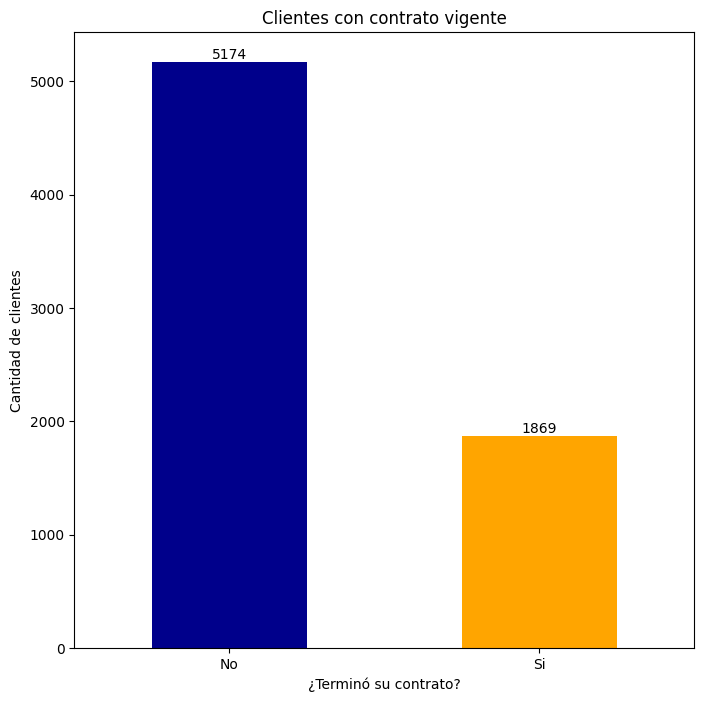

In [17]:
# Graficamos la cantidad de personas con contrato y sin contrato
fig, ax = plt.subplots(figsize=(8,8))

dft = contract_df['ContractEnd'].map({0:'No', 1:'Si'}).value_counts()
dft.plot(kind='bar', ax=ax, color=['darkblue', 'orange'])
ax.set_title('Clientes con contrato vigente')
ax.set_xlabel('¿Terminó su contrato?')
ax.set_ylabel('Cantidad de clientes')

# Coloca las etiquetas a las barras
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), f'{p.get_height():.0f}', ha='center', va='bottom')
    
# Rota las etiquetas del eje x
for tick in ax.get_xticklabels():
    tick.set_rotation(360)

***Conclusión***

Se observa que más de 5000 clientes aún tienen un contrato y poco menos de 2000 clientes terminaron su contrato con la empresa

### ¿Cuánto duró el contrato con la empresa?

Vamos a realizar un análisis para saber la duración de los contratos de los clientes que terminaron su contrato

In [18]:
# Creamos un df que contiene sólo las columnas de 'BeginDate' y 'EndDate' de las personas que ya no tienen contrato
duration_df = contract_df[contract_df['ContractEnd'] == 1][['BeginDate', 'EndDate']]

In [19]:
# Ahora cambiamos el tipo de objeto de las fechas
duration_df['BeginDate'] = pd.to_datetime(duration_df['BeginDate'])
duration_df['EndDate'] = pd.to_datetime(duration_df['EndDate'])

In [20]:
# Calculamos los días meses de duaración de los contratos
duration_df['Duration'] = round((duration_df['EndDate'] - duration_df['BeginDate']).dt.days / 30, 1)

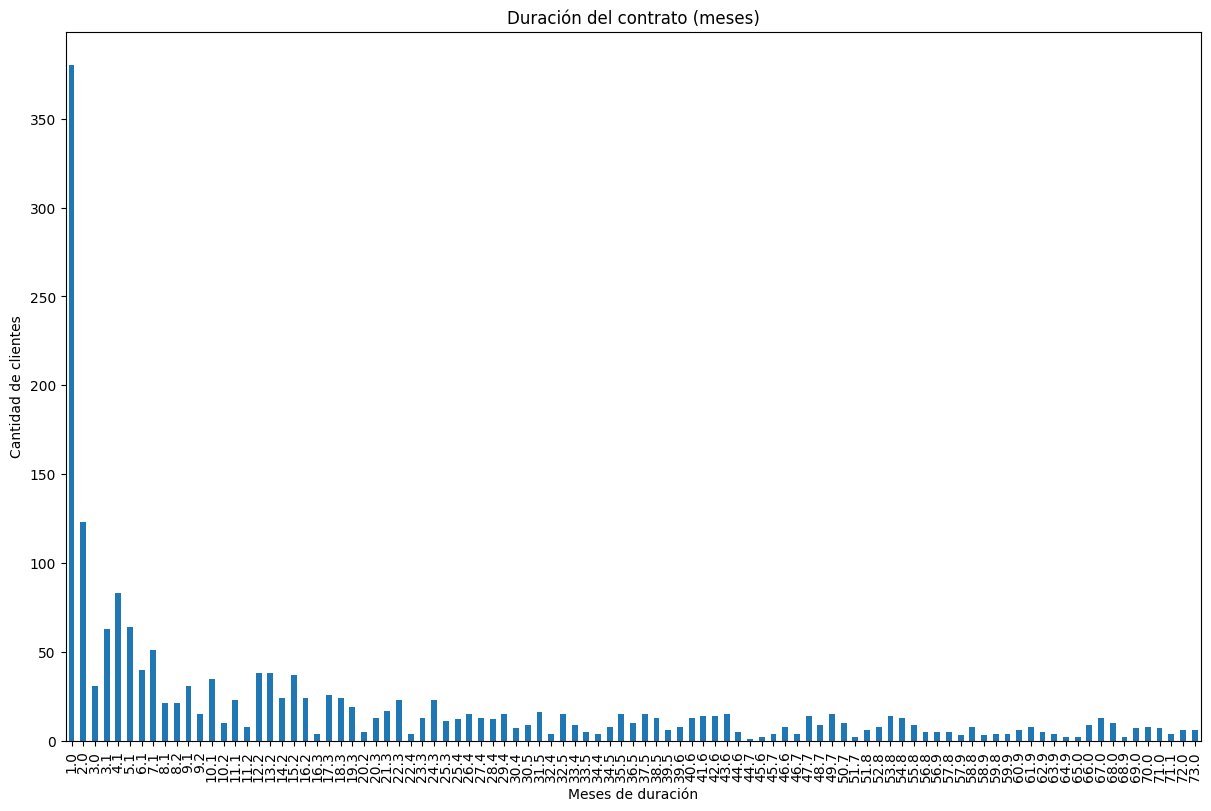

In [21]:
# Grafiquemos los meses que duró el contrato
fig, ax = plt.subplots(figsize=(12,8), layout='constrained')

dft = duration_df.groupby('Duration')['Duration'].value_counts()
dft.plot(kind='bar', ax=ax)
ax.set_title('Duración del contrato (meses)')
ax.set_xlabel('Meses de duración')
ax.set_ylabel('Cantidad de clientes')
for tick in ax.get_xticklabels():
    tick.set_rotation(90)


***Conclusión***

Podemos afirmar que aproximadamente 500 clientes terminaron sus contratos los primeros dos meses que estos se iniciaran. Esto es un 26.75% del total de clientes han terminado el contrato.

Al saber que la mayoría de los clientes sólo duran unos meses y por efectos de multicolinealidad, se va a eliminar la columna `'TotalCharges`. Además, `'MonthlyCharges'` refleja de mejor manera como ha sido la carga financiera de los clientes.

Con esto en mente pasemos a analizar los cargos mensuales de los clientes

### Cargos mensuales de los clientes

Primero se va a eliminar la columna `'TotalCharges'` y se después se va a analizar como es la carga mensual de los clientes que ya no tienen contrato como con los que si lo tienen.

### Los clientes que terminaron su contrato ¿tenían pareja e hijos?

Vamos a analizar si hay una posibilidad de que los clientes, que terminaron su contrato, fue porque ya tenían una pareja o dependientes.

In [22]:
merge_df = contract_df.merge(personal_df, on='customerID', how='left')

In [23]:
display(merge_df.sample(2))

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ContractEnd,gender,SeniorCitizen,Partner,Dependents
1812,2085-BOJKI,2018-09-01,No,One year,Yes,Bank transfer (automatic),96.65,1588.25,0,Male,0,Yes,No
5533,9279-CJEOJ,2018-05-01,No,Month-to-month,Yes,Bank transfer (automatic),95.40,2025.10,0,Female,1,No,No


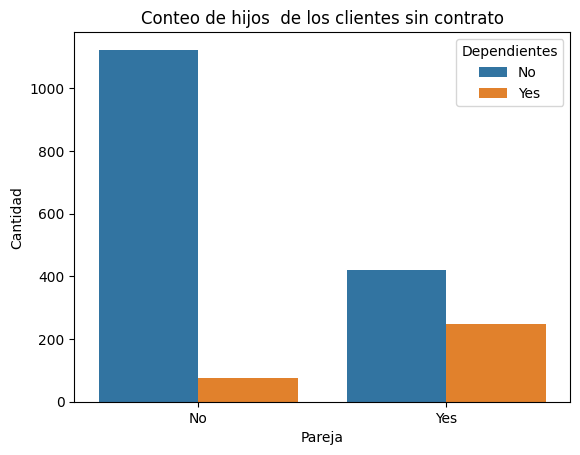

In [24]:
dft = merge_df[merge_df['ContractEnd'] == 1].groupby(['Partner', 'Dependents'])['Dependents'].value_counts()
dft = dft.reset_index()

sns.barplot(x=dft['Partner'], y=dft['count'], hue=dft['Dependents'])
plt.title("Conteo de hijos  de los clientes sin contrato")
plt.xlabel("Pareja")
plt.ylabel("Cantidad")
plt.legend(title="Dependientes")
plt.show()

***Conclusión***

Podemos observar que más de 1000 clientes que han terminado su contrato, no tienen pareja y no tienen personas dependientes. Esto representa más del 50% de los clientes totales que han terminado su contrato. Se puede decir que el tener una pareja y/o una persona dependiente no es un factor para que los clientes den por terminado el contrato con la empresa 

### ¿El tipo de contrato es igual entre los clientes que terminaron su contrato y ls clientes que siguen con su contrato?

Se va a analizar si los tipos de contrato es el mismo entre los clientes qe ya terminaron su contrato y los clientes que siguen son su contrato

**Clientes que ya terminaron su contrato**

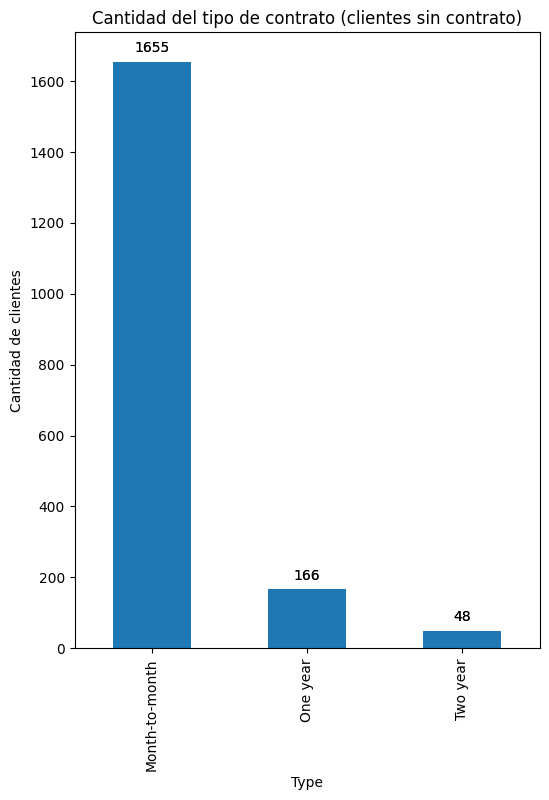

In [25]:
# vamos a graficar la columna Type de los clientes que ya no tienen contrato
# Filtramos el DF
dft = contract_df[contract_df['ContractEnd'] == 1].groupby('Type')['Type'].value_counts()

# Graficamos
dft.plot(kind='bar', title='Cantidad del tipo de contrato (clientes sin contrato)', figsize=(6,8), layout='constrained')
plt.xlabel('Tipo de contrato')
plt.ylabel('Cantidad de clientes')
for p in dft.plot(kind='bar').patches:
    dft.plot(kind='bar').annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2, p.get_height()), 
                                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

**Clientes con contrato vigente**

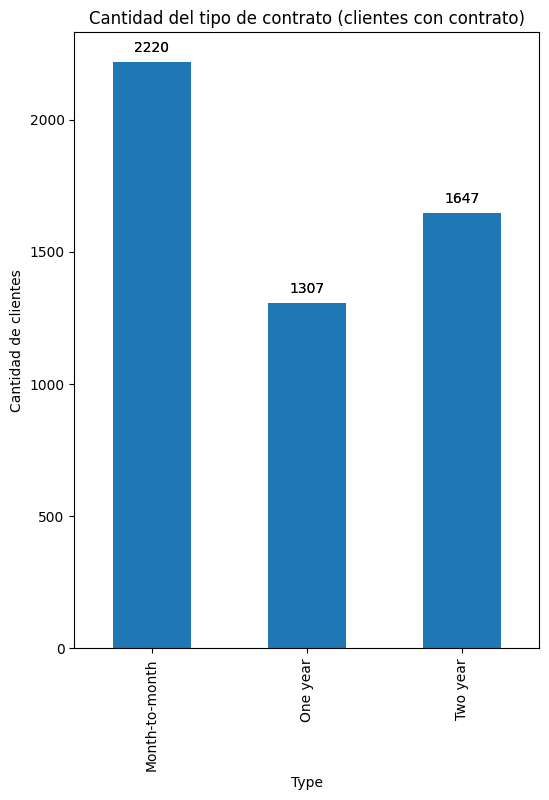

In [26]:
# vamos a graficar la columna Type de los clientes que siguen con contrato
# Filtramos el DF
dft = contract_df[contract_df['ContractEnd'] == 0].groupby('Type')['Type'].value_counts()

# Graficamos
dft.plot(kind='bar', title='Cantidad del tipo de contrato (clientes con contrato)', figsize=(6,8), layout='constrained')
plt.xlabel('Tipo de contrato')
plt.ylabel('Cantidad de clientes')
for p in dft.plot(kind='bar').patches:
    dft.plot(kind='bar').annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2, p.get_height()), 
                                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

***Conclusión***

Con las gráficas podemos observar que el tipo de contrato que predomina en los dos tipos de clientes es el de mes con mes. Sin embargo, con los clientes que ya no tienen contrato el tipo de 1 año y el tipo de 2 años presentan una mínima cantidad. Mientras que, con los clientes que tienen su contrato vigente, podemos observar que el contrato de 1 año y dos años está presente en más del 50% de los clientes.

Podemos decir que el tipo de contrato afecta si los clientes mantienen su contrato o no.

## Modelos

Nuestra tarea es una tarea de clasificación binaria donde nuestro objetivo es la columna `'ContractEnd'`. Se van a entrenar tres modelos diferentes y se va a elegir el modelo con el mayor valor AUC-ROC. Pero antes es necesario preparar los datos para el entrenamiento de los modelos

### Juntando los datasets

Se van a juntar los datasets que se tienen en uno solo y se va a buscar arrglar los problemas de valores ausentes que se presenten. Ya se tiene el dataset `merge_df`, el cual ya tiene juntos tres datasets, falta agregar `internet_df`.

In [27]:
# Se agrega internet_df a merge_df
merge_df = merge_df.merge(internet_df, on='customerID', how='outer')

In [28]:
# Se revisan los cambios realizados
display(merge_df.sample(2))

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ContractEnd,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
1117,1629-DQQVB,2018-12-01,No,Month-to-month,No,Bank transfer (automatic),50.10,709.5,0,Female,0,No,No,DSL,Yes,No,No,No,No,No
1251,1850-AKQEP,2019-06-01,No,Month-to-month,No,Mailed check,20.35,178.7,0,Male,0,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Ahora se revisan los valores ausentes que el dataset tiene
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   float64
 8   ContractEnd       7043 non-null   int64  
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  InternetService   5517 non-null   object 
 14  OnlineSecurity    5517 non-null   object 
 15  OnlineBackup      5517 non-null   object 
 16  DeviceProtection  5517 non-null   object 


Los valores ausentes representan una gran cantidad de datos de nuestro dataset, se decide cambiar los valores NaN por la palbara 'None' debido a que uno de los modelos que se usaran no puede manejar los valores ausentes.

In [30]:
merge_df = merge_df.fillna('None')

Borramos las columnas `customerID`, `BeginDate` y `EndDate` porque el tanto el id del cliente como las fechas no son relevantes para el entrenamiento de los modelos.

In [31]:
# Eliminación de columnas
merge_df = merge_df.drop(['customerID', 'BeginDate', 'EndDate'], axis=1)

In [32]:
# Verificación de los cambios realizados
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              7043 non-null   object 
 1   PaperlessBilling  7043 non-null   object 
 2   PaymentMethod     7043 non-null   object 
 3   MonthlyCharges    7043 non-null   float64
 4   TotalCharges      7043 non-null   float64
 5   ContractEnd       7043 non-null   int64  
 6   gender            7043 non-null   object 
 7   SeniorCitizen     7043 non-null   int64  
 8   Partner           7043 non-null   object 
 9   Dependents        7043 non-null   object 
 10  InternetService   7043 non-null   object 
 11  OnlineSecurity    7043 non-null   object 
 12  OnlineBackup      7043 non-null   object 
 13  DeviceProtection  7043 non-null   object 
 14  TechSupport       7043 non-null   object 
 15  StreamingTV       7043 non-null   object 
 16  StreamingMovies   7043 non-null   object 


### Codificación OHE

Unos modelos que serán utilizados requieren un tipo de codificación OHE.

In [33]:
# Codificación OHE
merge_ohe_df = pd.get_dummies(merge_df, drop_first=True)

# Comprobamos la codificación
print(merge_ohe_df.shape)

(7043, 27)


In [34]:
display(merge_ohe_df.sample(5))

,MonthlyCharges,TotalCharges,ContractEnd,SeniorCitizen,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,...,OnlineBackup_None,OnlineBackup_Yes,DeviceProtection_None,DeviceProtection_Yes,TechSupport_None,TechSupport_Yes,StreamingTV_None,StreamingTV_Yes,StreamingMovies_None,StreamingMovies_Yes
3441,92.15,3875.40,0,0,False,False,True,False,True,False,...,False,False,False,True,False,False,False,True,False,True
3186,44.05,483.70,1,0,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2483,74.40,74.40,1,1,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3772,19.95,907.05,0,0,False,True,False,False,True,False,...,True,False,True,False,True,False,True,False,True,False
4158,75.25,888.65,0,0,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


### Divisón del dataset

Se van a crear dos funciones para la división del dataset:
1. Función para dividir el dataset en features y target. El objetivo es la columna `'ContractEnd'`.
2. Función para dividir en el conjunto de entrenamiento y validación.

Se hacen funciones debido a que vamos a manejar dos tipos de datasets: Con codificación OHE y sin codificar.

In [35]:
# Función para dividir el objetivo de las características
def features_target(data, column):
    features = data.drop(column, axis=1)
    target = data[column]
    return features, target

In [36]:
# Función para dividir en los conjuntos de validación y entrenamiento
def train_valid(features, target):
    fatures_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25,
                                                                                 random_state=12345)
    return fatures_train, features_valid, target_train, target_valid

Ahora llamamos a las funciones para crear los conjuntos. Se va a llamar para el dataset que está codofocado con OHE y para el dataset que no tiene codificación

In [37]:
# División en features y target del dataset con codificación OHE en la columna 'ContractEnd'
features_ohe, target_ohe = features_target(merge_ohe_df, 'ContractEnd')

# División en features y target del dataset sin codificación OHE en la columna 'ContractEnd'
features, target = features_target(merge_df, 'ContractEnd')

In [38]:
# Set de entrenamiento y validación usando las características con codificación OHE
features_train_ohe, features_valid_ohe, target_train_ohe, target_valid_ohe = train_valid(features_ohe, target_ohe)

# Set de entrenamiento y validación usando las características con codificación OHE
features_train, features_valid, target_train, target_valid = train_valid(features, target)

### Escalado de características

Se va a realizar un escalado de características de las dos columnas numéricas que hay en los datasets, esto se realiza porque tenemos una tarea de clasificación binaria y es posible que el peso de esas dos características pueda cambiar las predicciones. Se va a crear uns función para escalar las características de los 2 conjuntos de datos que se tienen.

In [39]:
# Función para escalar características
def features_scaler(features_train, features_valid, numeric):
    scaler = StandardScaler()
    scaler.fit(features_train[numeric])
    features_train[numeric] = scaler.transform(features_train[numeric])
    features_valid[numeric] = scaler.transform(features_valid[numeric])
    
    return features_train, features_valid

In [40]:
# Llamada a la función en las características del dataset con codificación OHE
features_train_ohe, features_valid_ohe = features_scaler(features_train_ohe, features_valid_ohe, ['MonthlyCharges', 'TotalCharges'])

# Llamada a la función en las características del dataset sin codificación OHE
features_train, features_valid = features_scaler(features_train, features_valid, ['MonthlyCharges', 'TotalCharges'])

### Balanceo de clases

Anteriormente ya se vió que hay un claro desbalanceo de clases. Se va a aplicar la técnica del sobremuestro para reslover este problema.

La creación de la función de la función `upsample` servirá para aplicar el sobremuestreo en nuestros conjuntos. 

In [41]:
# Función para sobremuestreo
def upsample(features, target, repeat):
    features_zeros = features[target==0]
    features_ones = features[target==1]
    target_zeros = target[target==0]
    target_ones = target[target==1]
    print(features_zeros.shape)
    print(features_ones.shape)
    print(target_zeros.shape)
    print(target_ones.shape)
    arg1 = pd.concat([features_zeros] + [features_ones] * repeat)
    arg2 = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsample, target_upsample = shuffle(arg1, arg2, random_state=12345)
    
    return features_upsample, target_upsample

In [42]:
# Vamos a establecer un repetidor 
repeat = 110

# Llamamos a la función en el conjunto de entrenamiento de nuestros dos datasets
features_train_ohe, target_train_ohe = upsample(features_train_ohe, target_train_ohe, repeat)


features_train, target_train = upsample(features_train, target_train, repeat)

(3871, 26)
(1411, 26)
(3871,)
(1411,)
(3871, 16)
(1411, 16)
(3871,)
(1411,)


### Bosque Aleatorio de Decisión

Se va a entrenar el modelo para diferentes estimadores y profundidades y se va a elegir la que obtenga mejor valor AUC-ROC. Esto se va a lograr colocando el modelo dentro de dos ciclos `for`.

 Para este modelo vamos a utilizar el dataset cuyos datos tienen codificación OHE.

In [43]:
# Se establece un contador
best_AUC = 0
best_est = 0
best_depth = 0

In [44]:
%%time
# Modelo dentro de un ciclo for
##for est in range(1,11):
##    for depth in range(1,101, 10):
##        model_rfc = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
##        model_rfc.fit(features_train_ohe, target_train_ohe)
##        predict_valid_rfc = model_rfc.predict(features_valid_ohe)
##        auc_roc = roc_auc_score(target_valid_ohe, predict_valid_rfc)
##        if auc_roc > best_AUC:
##            best_AUC = auc_roc
##            best_est = est
##            best_depth = depth

##print(f'El mejor valor AUC-ROC del mejor modelo, con depth = {best_depth} y n_estimators = {best_est}, es: {best_AUC}')

CPU times: total: 0 ns
Wall time: 0 ns


### LightGBM

Se va a utilizar la librería LGBMRegressor para entrenar un modelo y obtener un valor AUC-ROC. Para este no es neceario usar una codificación OHE. Es decir, se va a utilizar `features_train`, `features_valid`, `target_train` y `target_valid`.

Para este modelo vamos a utilizar los índices de las columnas categóricas en lugar del nombre.

In [45]:
# Colocamos los índices de las columnas categóricas en una variable
cat_features = features_train.select_dtypes(['object']).columns
categorical_indices = [features_train.columns.get_loc(col) for col in cat_features]
print(categorical_indices)

[0, 1, 2, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15]


**Nota del estudiante**

Al pasar las columnas categóricas como tipo `object` el modelo presentaba errores, por lo que se cambió el tipo de datos a `category`, de esta forma el modelo trabajó sin problemas

In [46]:
# Cambiamos del tipo 'object' al tipo 'category'
features_train[cat_features] = features_train[cat_features].astype('category')
features_valid[cat_features] = features_valid[cat_features].astype('category')

In [47]:
%%time

# Se entrena el modelo
modelo_lgbm = LGBMClassifier(categorical_feature=categorical_indices, learning_rate=0.5, max_depth=4, n_estimators=500, random_state=12345)
modelo_lgbm.fit(features_train, target_train)

c:\Users\juan_\Documents\TripleTen\final_project\venv\Lib\site-packages\lightgbm\basic.py:2108: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(


[LightGBM] [Warning] categorical_feature is set=0,1,2,5,7,8,9,10,11,12,13,14,15, categorical_column=0,1,2,5,7,8,9,10,11,12,13,14,15 will be ignored. Current value: categorical_feature=0,1,2,5,7,8,9,10,11,12,13,14,15
[LightGBM] [Info] Number of positive: 155210, number of negative: 3871
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006862 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 561
[LightGBM] [Info] Number of data points in the train set: 159081, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.975666 -> initscore=3.691266
[LightGBM] [Info] Start training from score 3.691266
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

LGBMClassifier(categorical_feature=[0, 1, 2, 5, 7, 8, 9, 10, 11, 12, 13, 14,
                                    15],
               learning_rate=0.5, max_depth=4, n_estimators=500,
               random_state=12345)

In [48]:
predict_valid_lgbm = modelo_lgbm.predict(features_valid)

In [49]:
auc_roc_lgbm = roc_auc_score(target_valid, predict_valid_lgbm)

In [50]:
print(auc_roc_lgbm)

0.617510146219507


## Conclusión

Ahora sabemos que hay más clientes que aún tienen su contrato válido con la empresa. Sin embargo aún necesitamos saber cosas

De los clientes que terminaron su contrato: ¿Cuánto duro su contrato con la empresa? ¿Los clientes tenían una pareja e hijos? ¿Que tipo de contrato tenían? ¿Sus cargos mensuales o totales eran mayores que los de un cliente que sigue con su contrato? ¿Como era su servicio de Internet? ¿Tenían un servicio de teléfono diferente? ¿Porque los clientes que ya no tienen contrato se fueron?

**Código de solución**

Se va a realizar un código de solución respondiendo a estás preguntas, el cual tendrá aún más análisis exploratorio de datos y análisis estadístico